In [1]:
pip install -r requirement.txt


  Using cached PyWavelets-0.5.2.tar.gz (4.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [11 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\vrajc\AppData\Local\Temp\pip-install-zywxitrq\pywavelets_9d2b2e8dab7242ceb74714697975fe28\setup.py", line 205, in <module>
          write_version_py()
        File "C:\Users\vrajc\AppData\Local\Temp\pip-install-zywxitrq\pywavelets_9d2b2e8dab7242ceb74714697975fe28\setup.py", line 93, in write_version_py
          FULLVERSION, GIT_REVISION = get_version_info()
                                      ^^^^^^^^^^^^^^^^^^
        File "C:\Users\vrajc\AppData\Local\Temp\pip-install-zywxitrq\pywavelets_9d2b2e8dab7242ceb74714697975fe28\setup.py", line 69, in get_version_info
          import imp
      ModuleNotFoundError: No module named 'imp'
      [end of output]
  
  note: This error orig

In [2]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python 

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('D:/web_scraping/Trials/model/images/A._P._J._Abdul_Kalam.jpg')
img.shape

(260, 220, 3)

In [7]:
import os

file_path = 'D:/web_scraping/Trials/model/images/A._P._J._Abdul_Kalam.jpg'
print(os.path.abspath(file_path))


D:\web_scraping\Trials\model\images\A._P._J._Abdul_Kalam.jpg


In [8]:
import os

if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist.")


File exists.


In [9]:
from PIL import Image

try:
    img = Image.open(file_path)
    img.show()
except Exception as e:
    print(f"Error opening image: {e}")


In [10]:
import cv2

img = cv2.imread(file_path)
if img is not None:
    print("Image loaded successfully.")
    print("Image shape:", img.shape)
else:
    print("Failed to load image.")


Image loaded successfully.
Image shape: (260, 220, 3)


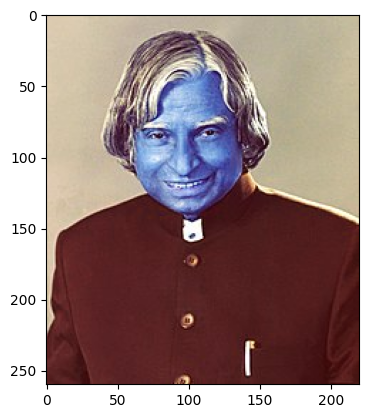

In [11]:
plt.imshow(img)

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(260, 220)

In [13]:
gray

array([[197, 196, 196, ..., 176, 177, 178],
       [197, 196, 196, ..., 179, 178, 177],
       [197, 196, 196, ..., 179, 179, 179],
       ...,
       [ 37,  37,  35, ...,  27,  25,  24],
       [ 38,  38,  37, ...,  28,  28,  27],
       [ 41,  40,  41, ...,  31,  33,  31]], dtype=uint8)

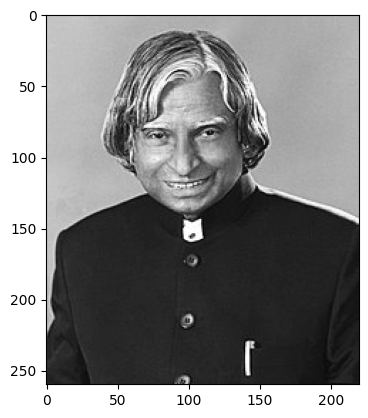

In [14]:
plt.imshow(gray, cmap='gray')

In [15]:
face_cascade = cv2.CascadeClassifier('D:/web_scraping/Trials/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('D:/web_scraping/Trials/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

faces

array([[59, 53, 83, 83]], dtype=int32)

In [16]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(59), np.int32(53), np.int32(83), np.int32(83))

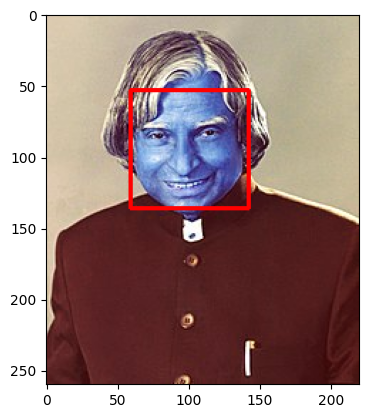

In [18]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

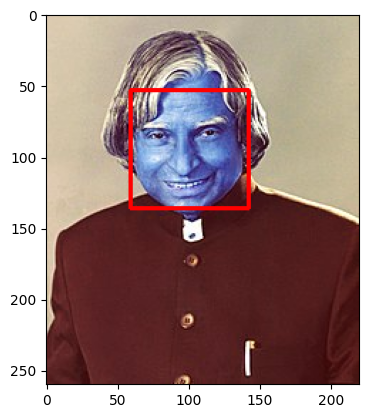

In [22]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [23]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

NameError: name 'roi_color' is not defined

Face detected at x=59, y=53, width=83, height=83


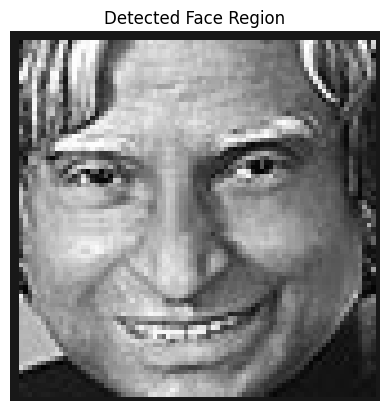

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

# Paths to the XML files
face_cascade_path = 'D:/web_scraping/Trials/model/opencv/haarcascades/haarcascade_frontalface_default.xml'
eye_cascade_path = 'D:/web_scraping/Trials/model/opencv/haarcascades/haarcascade_eye.xml'

# Initialize the classifiers
face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

# Check if the classifiers are loaded correctly
if face_cascade.empty():
    print("Failed to load face cascade.")
if eye_cascade.empty():
    print("Failed to load eye cascade.")

# Load the image
img_path = 'D:/web_scraping/Trials/model/images/A._P._J._Abdul_Kalam.jpg'
img = cv2.imread(img_path)

if img is not None:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Adjust the parameters for better detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
    
    if len(faces) == 0:
        print("No faces detected.")
    else:
        for (x, y, w, h) in faces:
            # Draw rectangles around detected faces
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            print(f"Face detected at x={x}, y={y}, width={w}, height={h}")

            # Extract the region of interest (ROI) for the face
            roi_color = img[y:y+h, x:x+w]

            # Convert ROI to grayscale for visualization
            roi_gray = cv2.cvtColor(roi_color, cv2.COLOR_BGR2GRAY)

            # Display the ROI using Matplotlib
            plt.imshow(roi_gray, cmap='gray')
            plt.title("Detected Face Region")
            plt.axis('off')  # Hide axes
            plt.show()

else:
    print("Failed to load image.")


In [2]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [4]:
cropped_img = np.array(roi_color)
cropped_img.shape

(83, 83, 3)

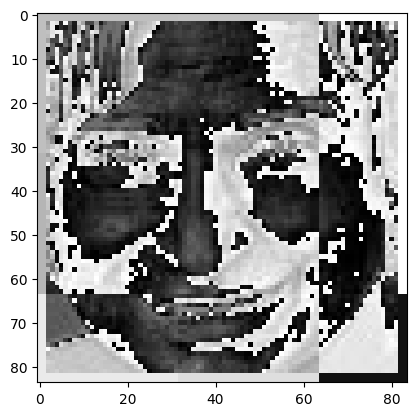

In [5]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [6]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

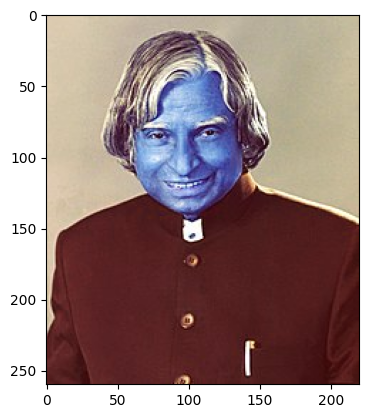

In [8]:
original_image = cv2.imread('D:/web_scraping/Trials/model/images/A._P._J._Abdul_Kalam.jpg')
plt.imshow(original_image)

TypeError: Image data of dtype object cannot be converted to float

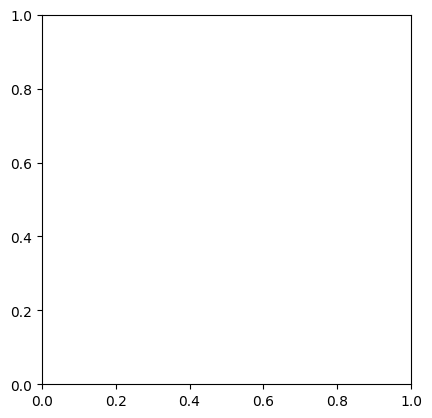

In [10]:
cropped_image = get_cropped_image_if_2_eyes('D:/web_scraping/Trials/model/images/A._P._J._Abdul_Kalam.jpg')
plt.imshow(cropped_image)